In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import pymysql
import matplotlib.pyplot as plt
import datetime, time

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
conn = pymysql.connect(host = '166.104.80.140',
                       port = 3309,
                       user = 'root',
                       password = 'ys3110hs!!',
                       db = 'test_db1')

In [3]:
sql_input = "SELECT * FROM test_meat5"
value = pd.read_sql_query(sql_input, conn)
#revise_value=value.iloc[:50000]
value['Time'] = pd.to_datetime(value['stamp'], unit='ms')
value = value.set_index(value['Time'])
value = value.drop(['stamp'], axis = 1)
value

,Sensor,Value,Time
Time,,,
2024-02-28 01:15:53,,inf,2024-02-28 01:15:53
2024-02-28 01:15:53,MQ5,inf,2024-02-28 01:15:53
2024-02-28 01:15:54,MQ6,inf,2024-02-28 01:15:54
2024-02-28 01:15:54,MQ7,inf,2024-02-28 01:15:54
2024-02-28 01:15:54,MQ8,inf,2024-02-28 01:15:54
...,...,...,...
2024-02-28 01:45:50,TGS2620,1.056563497,2024-02-28 01:45:50
2024-02-28 01:45:51,TGS2603,0.140845075,2024-02-28 01:45:51
2024-02-28 01:45:51,TGS2610,0.546006083,2024-02-28 01:45:51


In [4]:
value_drop=['MQ5','MQ6','','MQ7','MQ8','MQ9','MQ10','MQ11','MQ12']
value2=value.drop(value[value['Sensor'].isin(value_drop)].index)
value2

,Sensor,Value,Time
Time,,,
2024-02-28 01:15:55,TGS2600,1.032998562,2024-02-28 01:15:55
2024-02-28 01:15:56,TGS2602,0.975771725,2024-02-28 01:15:56
2024-02-28 01:15:59,TGS2620,0.973319054,2024-02-28 01:15:59
2024-02-28 01:16:00,TGS2603,0.140845075,2024-02-28 01:16:00
2024-02-28 01:16:00,TGS2610,0.546006083,2024-02-28 01:16:00
...,...,...,...
2024-02-28 01:45:47,TGS2600,1.006511450,2024-02-28 01:45:47
2024-02-28 01:45:47,TGS2602,1.008961201,2024-02-28 01:45:47
2024-02-28 01:45:50,TGS2620,1.056563497,2024-02-28 01:45:50


In [5]:
sensor_dict = {}
for sensor, group in value2.groupby('Sensor'):
    sensor_dict[sensor] = group.drop(columns=['Sensor'])
sensor_dict

{'TGS2600':                            Value                Time
 Time                                                
 2024-02-28 01:15:55  1.032998562 2024-02-28 01:15:55
 2024-02-28 01:16:07  0.973402500 2024-02-28 01:16:07
 2024-02-28 01:16:30  2.112349749 2024-02-28 01:16:30
 2024-02-28 01:16:40  1.867343664 2024-02-28 01:16:40
 2024-02-28 01:16:50  1.642202854 2024-02-28 01:16:50
 ...                          ...                 ...
 2024-02-28 01:44:48  1.013133287 2024-02-28 01:44:48
 2024-02-28 01:44:57  1.006511450 2024-02-28 01:44:57
 2024-02-28 01:45:24  1.066107512 2024-02-28 01:45:24
 2024-02-28 01:45:35  1.006511450 2024-02-28 01:45:35
 2024-02-28 01:45:47  1.006511450 2024-02-28 01:45:47
 
 [83 rows x 2 columns],
 'TGS2602':                            Value                Time
 Time                                                
 2024-02-28 01:15:56  0.975771725 2024-02-28 01:15:56
 2024-02-28 01:16:07  0.975771725 2024-02-28 01:16:07
 2024-02-28 01:16:21  2.363093376 

In [6]:
Title = ['TGS2600','TGS2602','TGS2603','TGS2610','TGS2611','TGS2612','TGS2620']

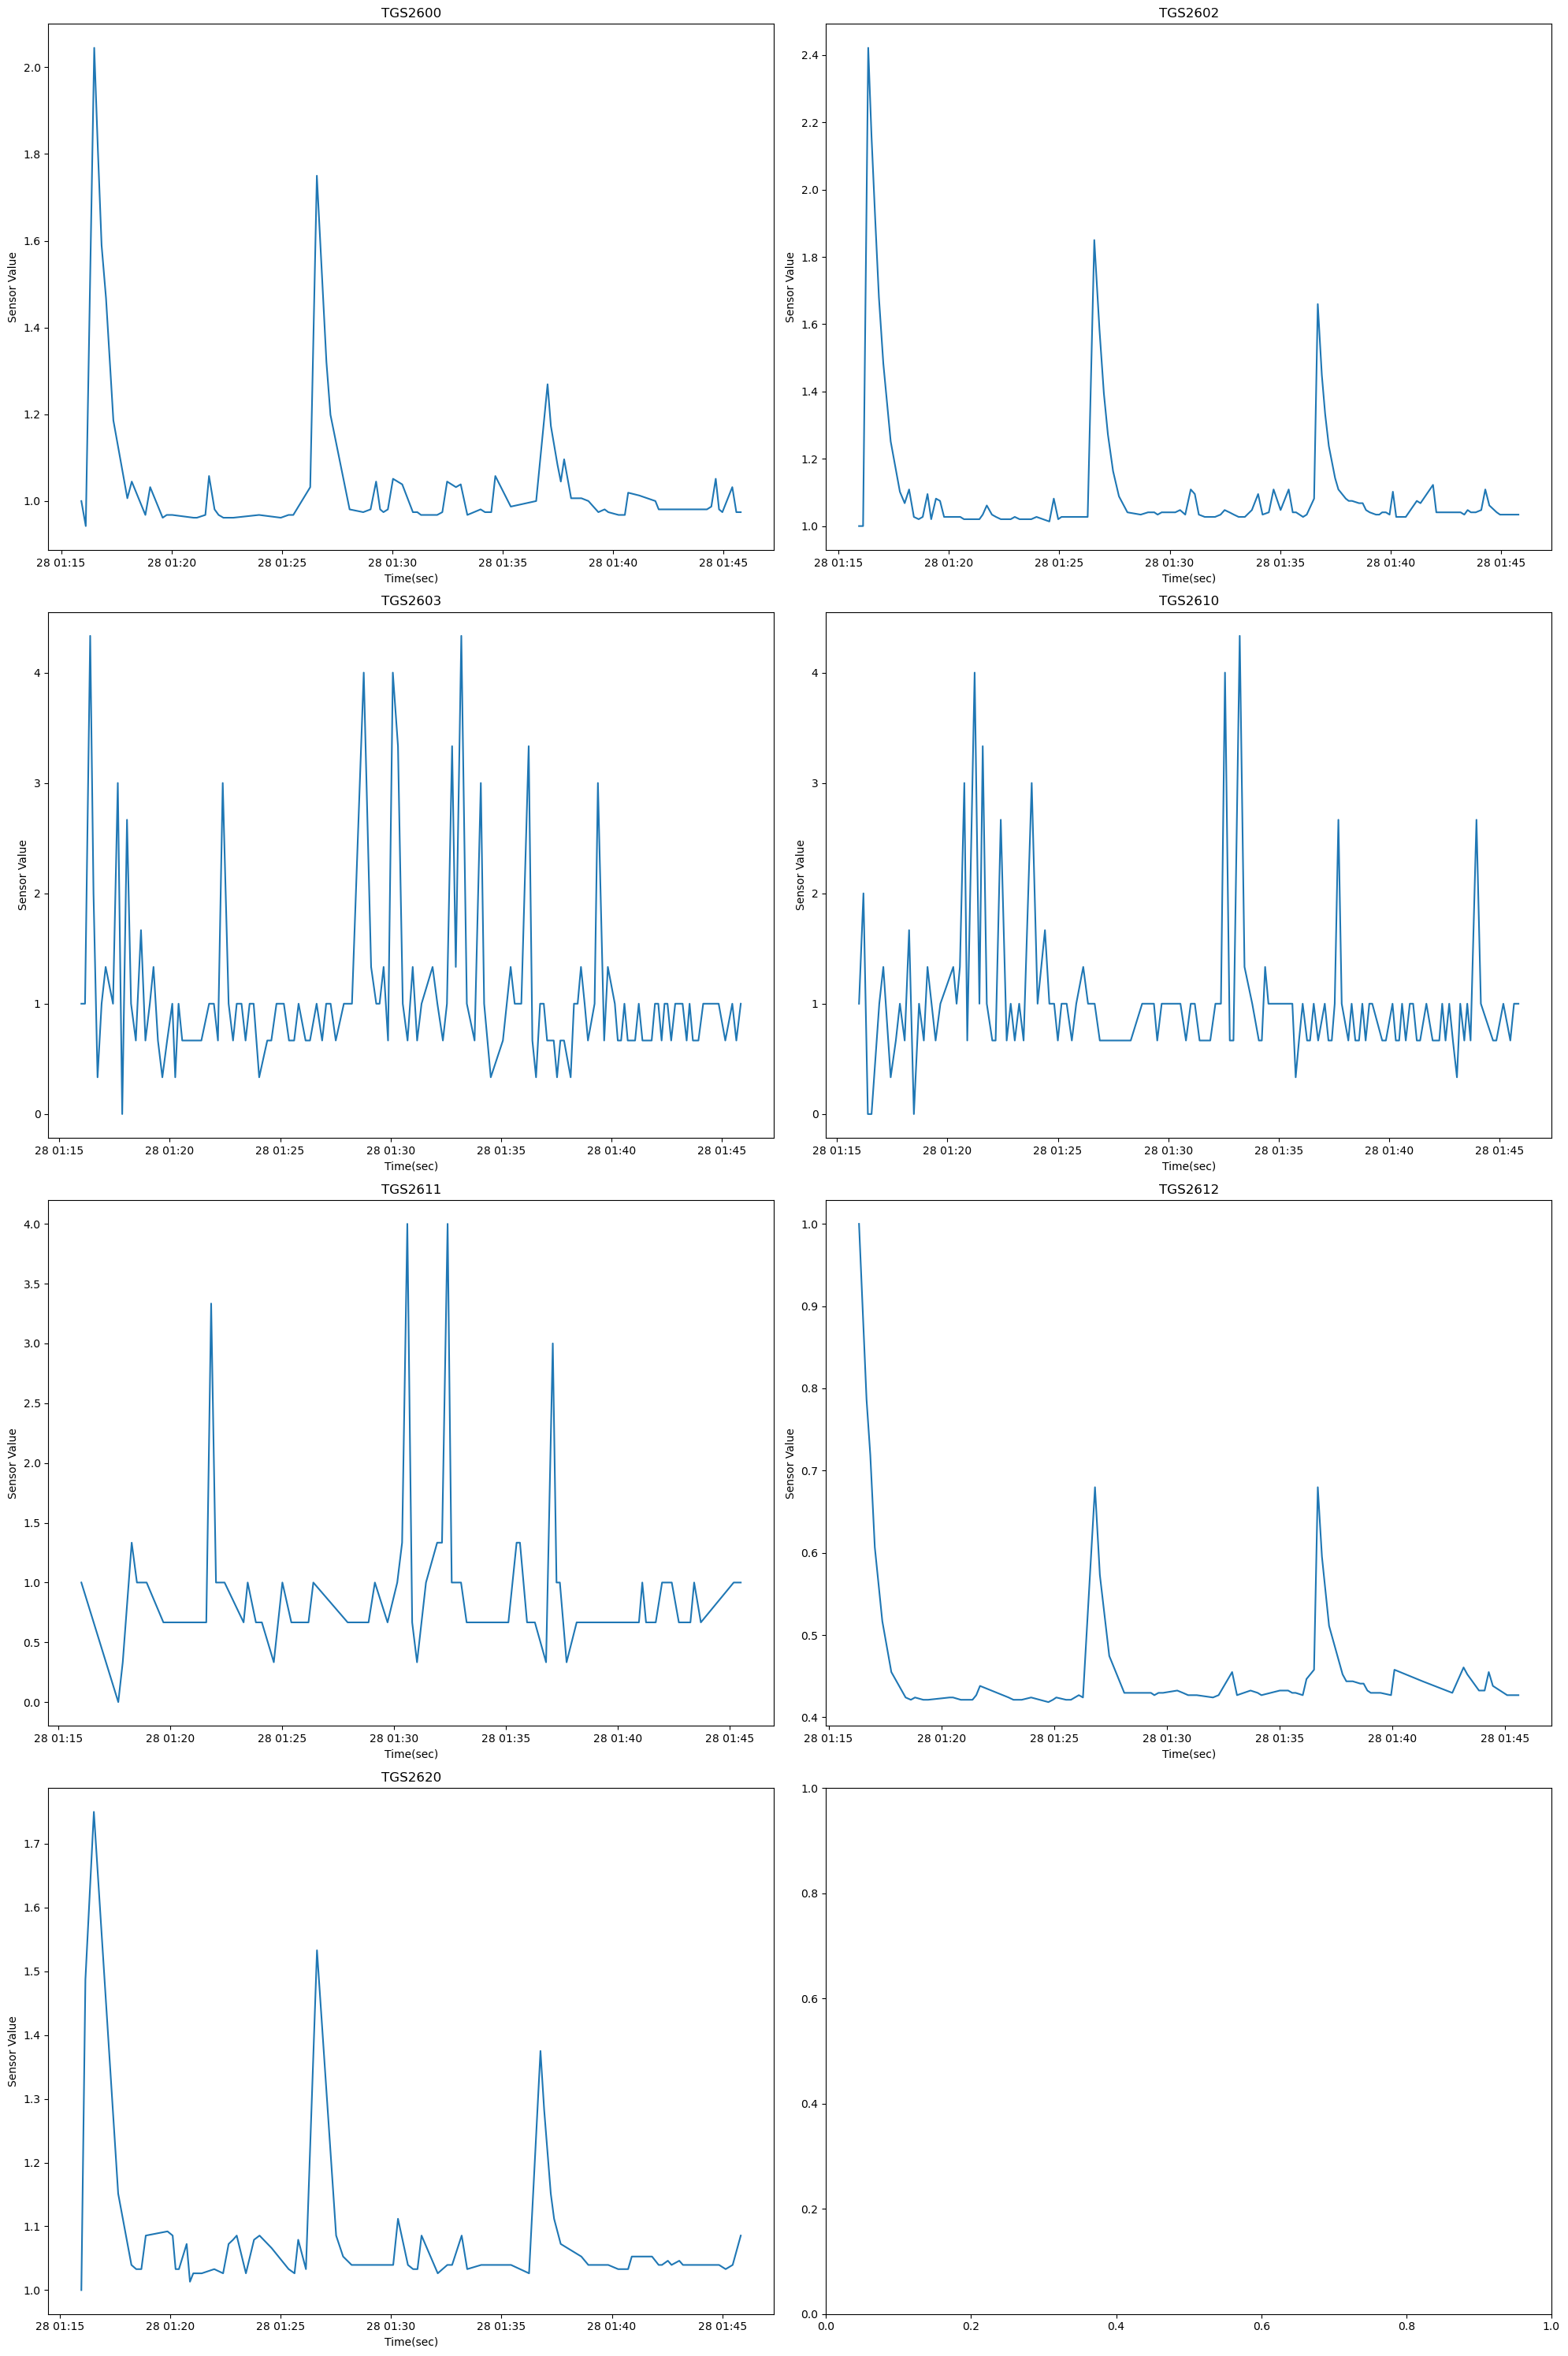

In [7]:
fig, axes = plt.subplots(nrows=len(sensor_dict)//2+1, ncols = 2, figsize=(20,30))
axes = axes.flatten()

for i, (sensor, data) in enumerate(sensor_dict.items()):
    data['Value'] = data['Value'].apply(pd.to_numeric)
    if data['Value'].iloc[0]!=0:
        data['Value'] = data['Value']/ data['Value'].iloc[0]
    ax = axes[i]
    ax.plot(data['Time'],data['Value'])
    ax.set_title(Title[i])
    ax.set_xlabel('Time(sec)')
    ax.set_ylabel('Sensor Value')
    #ax.set_xlim([-0.1,3500])
plt.tight_layout()